# Install seaborn and scikit-learn

In [64]:
!pip install seaborn
!pip install scikit-learn
!pip install pycountry pycountry-convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.9/339.9 kB 814.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pluggy
    Found existing installation: pluggy 1.3.0
    Uninstalling pluggy-1.3.0:
      Successfully uninstalled pluggy-1.3.0


# Build librairy

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pycountry_convert

In [52]:
def p(param, flag=False):
    if (flag):
        print(param)

# **Collecting Survey Data from CSV File**

## Load dataframe using csv file

In [7]:
# Load the dataset
df = pd.read_csv('stack-overflow-developer-survey-2023/survey_results_public.csv')

In [8]:
# Overview of the data
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


## Finding duplicate
Find how many duplicated rows exist in dataframe

In [9]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

### Removing duplicated rows
There is no duplicate which mean the code to drop duplicate is just for education purpose

In [10]:
df.drop_duplicates(inplace=True)

## Finding missing values
Find missing values for all column

In [13]:
missing_value = df.isnull().sum()
missing_value

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64

## Basic statistique of the dataframe

In [14]:
df.describe(include='all')

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
count,89184.000000,89184,89184,89184,87898,73810,73764,87973,87663,70084,...,41916,41925,41054,42778,42629,41783,36774,86485,86554,4.801900e+04
unique,NaN,1,6,8,106,3,116,8,790,7940,...,5,5,5,5,5,284,12,3,3,NaN
top,NaN,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,1-2 times a week,30-60 minutes a day,15-30 minutes a day,None of these,"Information Services, IT, Software Development...",Appropriate in length,Easy,NaN
freq,NaN,89184,67237,33247,53748,31131,15308,36706,4873,1182,...,25528,18930,21470,16338,13678,4871,18159,65962,54092,NaN
mean,44592.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.031101e+05
std,25745.347541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.814188e+05
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,22296.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.390700e+04
50%,44592.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.496300e+04
75%,66888.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.216410e+05


### Statistique of the numerique column

In [15]:
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


## Display the column name

In [57]:
p(df.columns.tolist(),True)

['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith', 'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFr

# **Exploratory Data Analysis Lab**

## Histogram of the Age by range

In [54]:
df_age_range = df[['Age']].groupby('Age').size().reset_index(name='Count')
df_age_range['Age'] = df_age_range['Age'].replace('Under 18 years old', '0-18 years old').replace('65 years or older', '65-100 years old')
df_age_range['Age'] = df_age_range['Age'].str.replace('years old', '').str.replace('Prefer not to say', 'RAS')
df_age_range = df_age_range[['Age', 'Count']].sort_values(by = 'Age')
p(df_age_range)

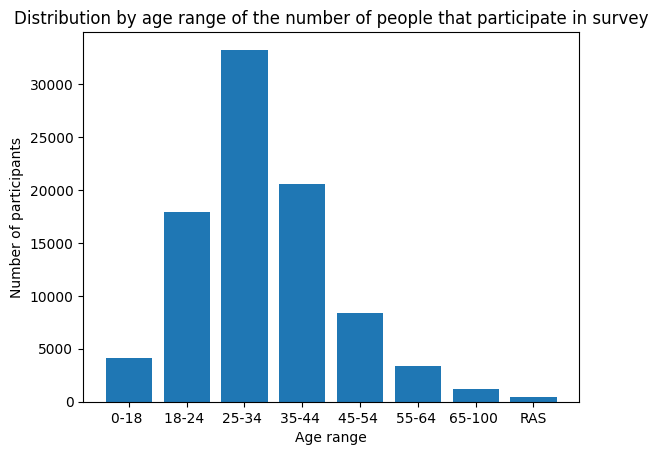

In [44]:
# Create histogram
plt.bar(df_age_range['Age'], df_age_range['Count'])

# Add title and labels
plt.title('Distribution by age range of the number of people that participate in survey')
plt.xlabel('Age range')
plt.ylabel('Number of participants')

# Show plot
plt.show()

## Country that took place to the survey

In [61]:
df_country = df[['Country']].groupby('Country').size().reset_index(name='Count')
p(df_country, True)

                                  Country  Count
0                             Afghanistan     64
1                                 Albania     60
2                                 Algeria     85
3                                 Andorra     16
4                                  Angola     13
..                                    ...    ...
180  Venezuela, Bolivarian Republic of...    106
181                              Viet Nam    390
182                                 Yemen     20
183                                Zambia     26
184                              Zimbabwe     34

[185 rows x 2 columns]


#### Convert Country to continent
Add continent column to ta the dataframe

In [158]:
from pycountry_convert import country_name_to_country_alpha2, country_alpha2_to_continent_code, convert_continent_code_to_continent_name

# Function to return the continebt of the country
def get_continent(country_name):
    try:
        country_code = country_name_to_country_alpha2(country_name)
        continent_code = country_alpha2_to_continent_code(country_code)
        return continent_code
    except KeyError:
        return 'None'

# Apply the function to create a new column with continents
df_country['Continent'] = df_country['Country'].apply(get_continent)
p(df_country)

In [159]:
# Check the country with the continent none and update the country name
selected_rows = df_country[df_country['Continent'] == 'None']
p(selected_rows)

In [162]:
df_continent = df_country.groupby('Continent')['Count'].sum().reset_index(name='Count').sort_values(by = 'Count', ascending=False)
p(df_continent, True)


  Continent  Count
2        EU  40797
3        NA  23195
1        AS  14611
6        SA   3895
5        OC   2763
0        AF   2534
4      None    178


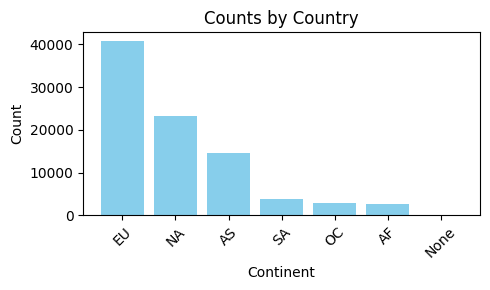

In [163]:
plt.figure(figsize=(5, 3))  # Set the figure size

plt.bar(df_continent['Continent'], df_continent['Count'], color='skyblue')  # Create bar plot
plt.xlabel('Continent')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.title('Counts by Country')  # Title of the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Show the plot

([<matplotlib.patches.Wedge at 0x7f095389fb50>,
 [Text(0.1250191121242464, 1.0928724635581526, 'EU'),
  Text(-0.9075498275441836, -0.621573254351024, 'NA'),
  Text(0.40781114970046234, -1.0216115045260539, 'AS'),
  Text(0.9490165812670673, -0.5562081700947658, 'SA'),
  Text(1.0533214046358945, -0.3170394589571874, 'OC'),
  Text(1.0941470524030827, -0.11332355323429368, 'AF'),
  Text(1.099977776350148, -0.006992248263915644, 'None')],
 [Text(0.06819224297686166, 0.5961122528499013, '46.4%'),
  Text(-0.4950271786604637, -0.33903995691874034, '26.4%'),
  Text(0.22244244529116128, -0.557242638832393, '16.6%'),
  Text(0.5176454079638548, -0.30338627459714496, '4.4%'),
  Text(0.5745389479832151, -0.17293061397664766, '3.1%'),
  Text(0.5968074831289542, -0.06181284721870563, '2.9%'),
  Text(0.5999878780091715, -0.003813953598499442, '0.2%')])

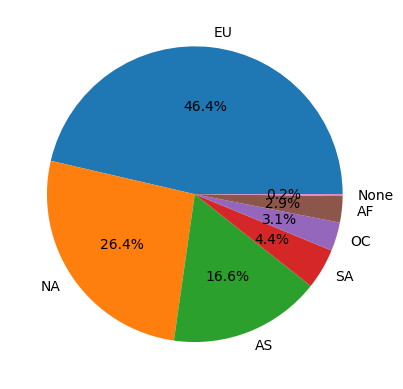

In [168]:
fig, ax = plt.subplots()
ax.pie(df_continent['Count'], labels = df_continent['Continent'], autopct='%1.1f%%')

# END